BMGC Homepage: https://sites.google.com/iiitd.ac.in/bigmm2020datachallenge/home

Linguistic Aspects -

Relevance: This category utilizes image and text labels aimed to identify if the tweet is related to the MeToo movement. Relevant tweets include personal opinions, instances of abuse, support for the victims of the campaign, or links to the news articles. Relevance had two levels of labels, text only informative and image only informative, implying the relevance of text and image labels for a given tweet.

Stance: Stance detection label helps to understand the public opinion about a topic and also has downstream application tasks. Stance detection labels are segregated into three categories: Support, Opposition, Neither. Support includes tweets that expressed appreciation of the MeToo movement, shared resources for victims of sexual abuse, or offered empathy towards the victims.

Hate Speech: Detection of hate speech has been gaining interest in linguistic research lately. For a given tweet, the hate speech was distributed into Directed Hate and Generalized Hate. 

Sarcasm: Sarcasm detection is of interest in areas like sentiment analysis and affective computing. The tweet has been marked as sarcastic if it includes details about an individual involved, an entity, or the movement in humorous overtone.

Dialogue Acts: A dialogue act is defined as a function of the speaker's utterance during the conversation. The dataset includes dialogue acts that are specific to the MeToo movement: Allegation, Refutation, and Justification. 

## Connect to Google Drive

First thing first, connect this Google Colab project to Google Drive.

Run the code below to connect them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing Libraries

In [ ]:
import os
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import f1_score
from matplotlib import style
style.use('fivethirtyeight')

os.chdir("/content/drive/My Drive/Colab Notebooks/BigMM/")

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

from nltk.tokenize import word_tokenize
from nltk.text import Text
import gensim
from gensim import corpora, models, similarities

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/BigMM'

In [ ]:
df = pd.read_csv("merged_tweets.txt")
df = df.drop(columns = ['Unnamed: 0'],axis=1)
df.sample(2)

,Tweets,TweetId,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
1968,"NEW on @WMCLive! @TheRobinMorgan on women and climate change. Guests: Investigative journalists, Susan Antilla (@antillaview) on #MeToo vs. Wall St; and Kathryn Joyce (@kathrynajoyce) on the religious adoption industry and migrant kids. HERE: https://t.co/plHB3ZoAh1 https://t.co/UJtNAY2iYs",1051583935728295937,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,RBG is joining the #metoo movement \nLet it be known what Abe Lincoln did to her\nI don't want to hear any bullshit denying this one from you right wingers .. this is a fact what Abe did..\nCNN ABC NBC news reporter checking out\n\n#maga #kag #Qanon #Qarmy #redoctober #deepstatepanic https://t.co/BNtFwnVhsy,1051614324798738432,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
flag_cols = ['Text_Only_Informative', 'Image_Only_Informative', 'Directed_Hate', 'Generalized_Hate', 'Sarcasm', 'Allegation', 'Justification', 
             'Refutation', 'Support', 'Oppose']
for i in flag_cols:
  df[i] = df[i].map({1.0: 1, 0.0: 0})
  df[i] = df[i].astype('uint8')

# Basic Preprocessing


## Text Cleaning - I

In [ ]:
! pip install tweet-preprocessor

In [ ]:
import preprocessor as p
clean=[]
for i in df['Tweets']:
    clean.append(p.clean(i))

#pd.DataFrame(clean)
df['Cleaned']=pd.DataFrame(clean)

In [ ]:
df['Cleaned'] = df['Cleaned'].apply(lambda x: x.replace('\n', ''))
df['Cleaned'] = df['Cleaned'].apply(lambda x: x.rstrip('\n'))
df['Cleaned'].sample(5)
#still \n values exist!!

1347    Kyrsten Sinema tells men arent entitled to due process in her eyes and women should always be believed - even if they have no evidence. 
2445    Please understand this, very very important!\n\n                                                                                        
5604    A nice lil ignorant comment to get me riled up on a Monday morning                                                                      
3432    Message from n\There's a special place in hell for all those hecklers and supporters of Whacko Franco.\"\n "                            
3700    Does your workplace allow and encourages feedback related to sexual harassment?\nJoin this conversation on . Link in the first commnet\n
Name: Cleaned, dtype: object

In [ ]:
# to clean data
def normalise_text (text):
    text = text.str.lower() # lowercase
    text = text.str.replace(r"\\n","")
    text = text.str.replace(r"\n\n"," ")
    text = text.str.replace(r"\n","")
    text = text.str.replace(r"\#","") # replaces hashtags
    text = text.str.replace(r"http\S+","URL")  # remove URL addresses
    text = text.str.replace(r"@","")
    text = text.str.replace(r"[^A-Za-z0-9!?\'\`\"]", " ")
    text = text.str.replace(r"!"," ")
    text = text.str.replace(r"'","")
    text = text.str.replace(r"?"," ")
    text = text.str.replace("\s{2,}", " ")
    text = text.str.replace("\"", "")
    return text
df["new_Cleaned"]=normalise_text(df["Cleaned"])
#test["new_Cleaned"]=normalise_text(test["Cleaned"])

In [ ]:
pd.set_option('display.max_colwidth', -1)
df.sample(10)

## Text Cleaning - II

We will clean the text by removing any punctuations. In addition, this steps also removes any twitter username (@username...) and websites link (http... and www...). The processes above are done using Regular Expression method to search for matching texts.


In [ ]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
twitter_handle = r'@[A-Za-z0-9_]+'                         # remove twitter handle (@username)
url_handle = r'http[^ ]+'                                  # remove website URLs that start with 'https?://'
combined_handle = r'|'.join((twitter_handle, url_handle))  # join
www_handle = r'www.[^ ]+'                                  # remove website URLs that start with 'www.'
punctuation_handle = r'\W+'

In [ ]:
# Local directory
#stopwords = set(pd.read_csv('/content/drive/My Drive/Colab Notebooks/BigMM/data_20200526/stop-word-list.txt', sep='\n', header=0).stopword)
stopwords = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BigMM/data_20200526/stop-word-list.txt', sep='\n', header=None)

Define a function called `process_text` to process the text using the methods listed above. 

In [ ]:
def process_text(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()

    try:
        text = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        text = souped

    cleaned_text = re.sub(punctuation_handle, " ",(re.sub(www_handle, '', re.sub(combined_handle, '', text)).lower()))
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stopwords])

    return (" ".join([word for word in tokenizer.tokenize(cleaned_text) if len(word) > 1])).strip()

Below is an input-based example to test the above text cleaning method. Try it~

Then we will create a new column in our data named `clean_text` to store the cleaned text. 

We will process every row in variable `attribute`, which is the raw text from the .csv data. Then concate the new attribute `clean_text` to the original data file.

In [ ]:
cleaned_text = []

for text in df.new_Cleaned:
    cleaned_text.append(process_text(text))
clean_text = pd.DataFrame({'clean_text' : cleaned_text})
data = pd.concat([df, clean_text], axis = 1)

In [ ]:
data.sample(2)

,Tweets,TweetId,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose,Cleaned,new_Cleaned,clean_text
2468,"Sorry @MallikaDua, your father @VinodDua7 is also one who belongs to the Hall of Shame. #MeToo : Nishtha Jain\n\n#VinodDua\nhttps://t.co/erAI2YC4CY",1051336799329574912,1,1,0,0,0,0,0,0,1,0,"Sorry , your father is also one who belongs to the Hall of Shame. : Nishtha Jain\n\n\n",sorry your father is also one who belongs to the hall of shame nishtha jain,sorry your father is also one who belongs to the hall of shame nishtha jain
2454,We are talking #sexual #harassment at the #workplace today with @SinfullyAlive from @FRIDAfund #MeToo https://t.co/RokIEivIMO,1050979970397495297,1,0,0,0,0,0,0,0,0,0,We are talking at the today with from,we are talking at the today with from,we are talking at the today with from


## EDA

In [ ]:
counts = []
categories = flag_cols #list(df.columns.values)
for i in categories:
    counts.append((i, df[i].sum()))
df_stats = pd.DataFrame(counts[:10], columns=['Category','number_of_comments'])
df_stats

,Category,number_of_comments
0,Text_Only_Informative,4989
1,Image_Only_Informative,2271
2,Directed_Hate,257
3,Generalized_Hate,194
4,Sarcasm,146
5,Allegation,365
6,Justification,230
7,Refutation,143
8,Support,2189
9,Oppose,505


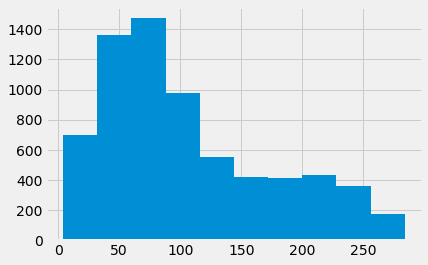

In [ ]:
#Tweet Length
lengths = df.Cleaned.str.len()
lengths.hist()

### WORD CLOUD

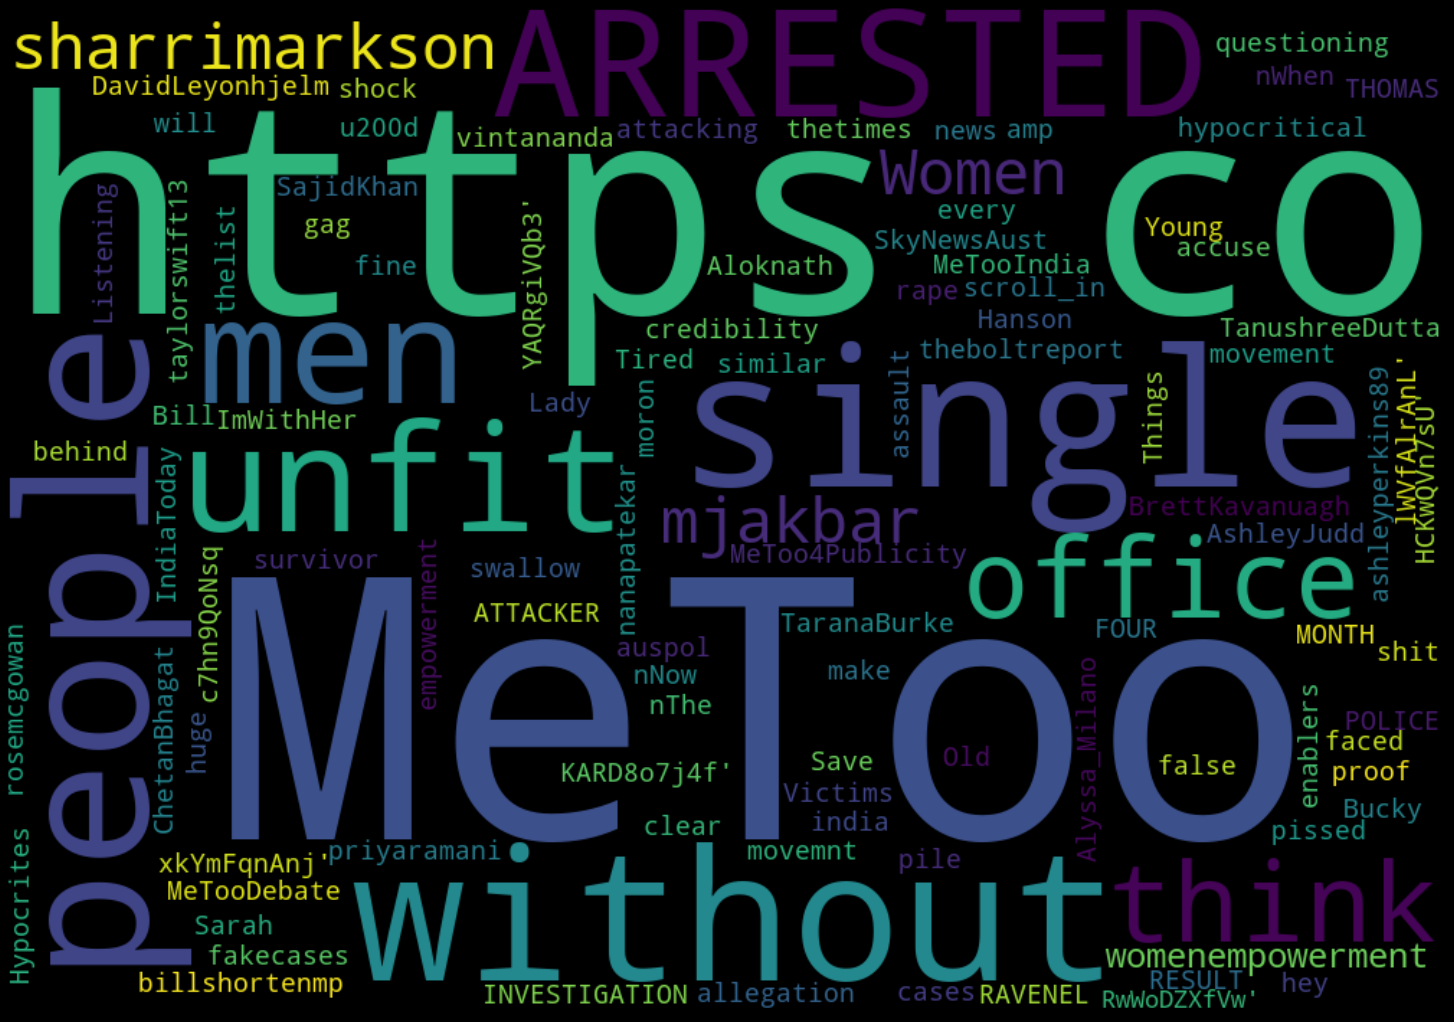

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data.Tweets.values
wordcloud = WordCloud(
    width = 1000,
    height = 700,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

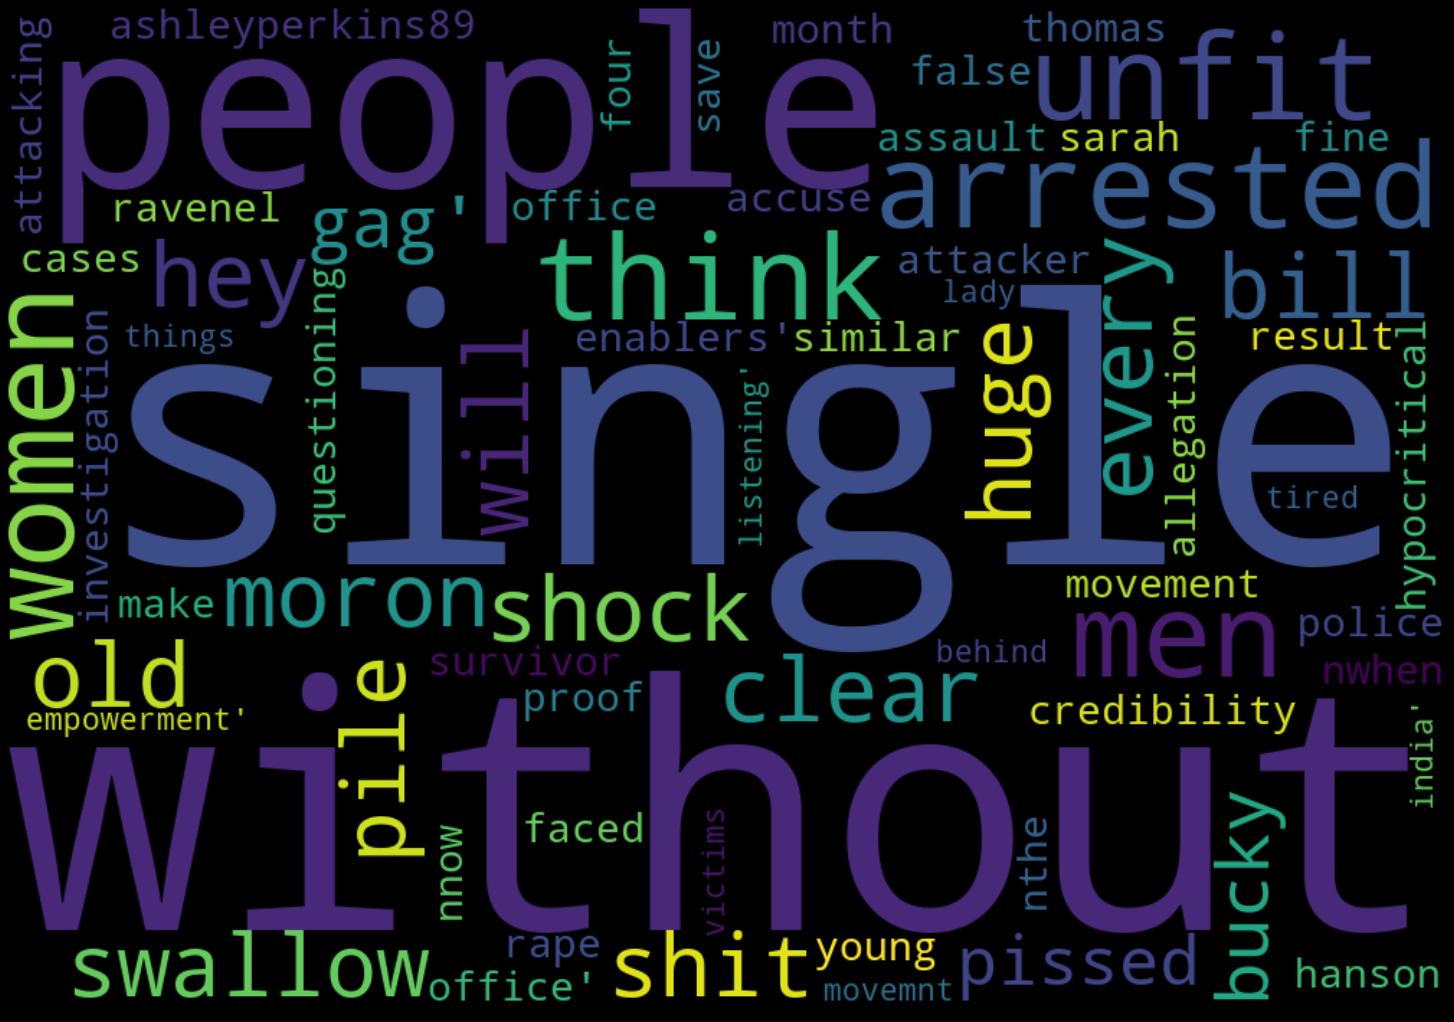

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data.clean_text.values
wordcloud = WordCloud(
    width = 1000,
    height = 700,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### COMMON WORDS IN TWEETS

In [ ]:
from collections import Counter
df['temp_list'] = df['Cleaned'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,3815
1,to,3214
2,of,2662
3,and,2193
4,a,1963
5,in,1771
6,is,1424
7,on,1329
8,for,1199
9,\n,853


In [ ]:
data.sample(1)

,Tweets,TweetId,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose,Cleaned,new_Cleaned,clean_text
5256,"@sagarikaghose @RSSorg @swaminomics This topos your Gang ? Your Gang promote \Kiss On Road \"" Later Porn in Girls , Later Drugs in Girls , Later Starting #MeToo tipos where you target Those Youth Enjoy Your So called empowerment. Fact .. Its real World of Left Liberal Where everything for SEX SEX SEX &amp; Money. https://t.co/WpWcnjBUiw""",1053936791969886208,0,0,0,0,0,0,0,0,0,0,"This topos your Gang ? Your Gang promote \Kiss On Road \"" Later Porn in Girls , Later Drugs in Girls , Later Starting tipos where you target Those Youth Enjoy Your So called empowerment. Fact .. Its real World of Left Liberal Where everything for SEX SEX SEX &amp; Money. """,this topos your gang your gang promote kiss on road later porn in girls later drugs in girls later starting tipos where you target those youth enjoy your so called empowerment fact its real world of left liberal where everything for sex sex sex amp money,this topos your gang your gang promote kiss on road later porn in girls later drugs in girls later starting tipos where you target those youth enjoy your so called empowerment fact its real world of left liberal where everything for sex sex sex amp money


### DERIVED LABELS [to check Interactions between existing labels]

- Created None_all_classes column, a flag which is 1 when all other attributes are zeros
- Created None_wo_support column, a flag which is 1 when all other attributes (except Support) are zeros

In [ ]:
data['None_all_classes'] = np.where(data.Text_Only_Informative + data.Image_Only_Informative + data.Directed_Hate + data.Generalized_Hate + data.Sarcasm +
                              data.Allegation + data.Justification + data.Refutation + data.Support + data.Oppose == 0, 1, 0)

data['None_wo_support'] = np.where(data.Text_Only_Informative + data.Image_Only_Informative + data.Directed_Hate + data.Generalized_Hate + data.Sarcasm +
                              data.Allegation + data.Justification + data.Refutation + data.Oppose == 0, 1, 0)

In [ ]:
print(data['None_all_classes'].sum())
print(data['None_wo_support'].sum())

1409
1410


In [ ]:
data[data['None_all_classes'] != data['None_wo_support']]

,Tweets,TweetId,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose,Cleaned,None_all_classes,None_wo_support
4227,"@smritiirani \nIf you act with #MeTooIndia / #MeToo with this post , I don't have problem in throwing you away Ms. *Smriti Irani* (Textiles Minister) Shameless woman!\n#SabarimalaProtests https://t.co/4gLPejzPmG",1054787653864955906,0,0,0,0,0,0,0,0,1,0,"\nIf you act with / with this post , I don't have problem in throwing you away Ms. *Smriti Irani* (Textiles Minister) Shameless woman!\n",0,1


In [ ]:
data.sample(1)

,Tweets,TweetId,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose,Cleaned,None_all_classes,None_wo_support
4511,"#MeToo: Sruthi Hariharan finds supporters in Prakash Raj, Shraddha Srinath over her sexual harassment allegations against Arjun Sarja\n\nhttps://t.co/W6MzmaxHMj https://t.co/yRahLvg0gV",1054559808362229761,0,1,0,0,0,0,0,0,0,0,": Sruthi Hariharan finds supporters in Prakash Raj, Shraddha Srinath over her sexual harassment allegations against Arjun Sarja\n\n",0,0


To check further interactions, we grouped the attributes into 4 levels (according to the Problem Statement description).
- Dialogue acts that were specific to the MeToo movement: Allegation, Refutation and Justification.
- Hate speech was distributed into Directed Hate and Generalized Hate.
- Stance detection labels were segregated into categories: Support & Opposition
- Relevance had two levels of labels, text only informative & image only informative, implying the relevance of text and image labels on tweets

We create flags based on above rulesets, such that if any of these individual labels within levels are not present, flag returns 0 else 1


In [ ]:
data['dialogue_acts']= np.where(data.Allegation + data.Justification + data.Refutation == 0, 0, 1)
data['hate_speech'] = np.where(data.Directed_Hate + data.Generalized_Hate== 0, 0, 1)
data['stance'] = np.where(data.Support + data.Oppose == 0,0,1)
data['relevance'] = np.where(data.Text_Only_Informative + data.Image_Only_Informative == 0,0,1)

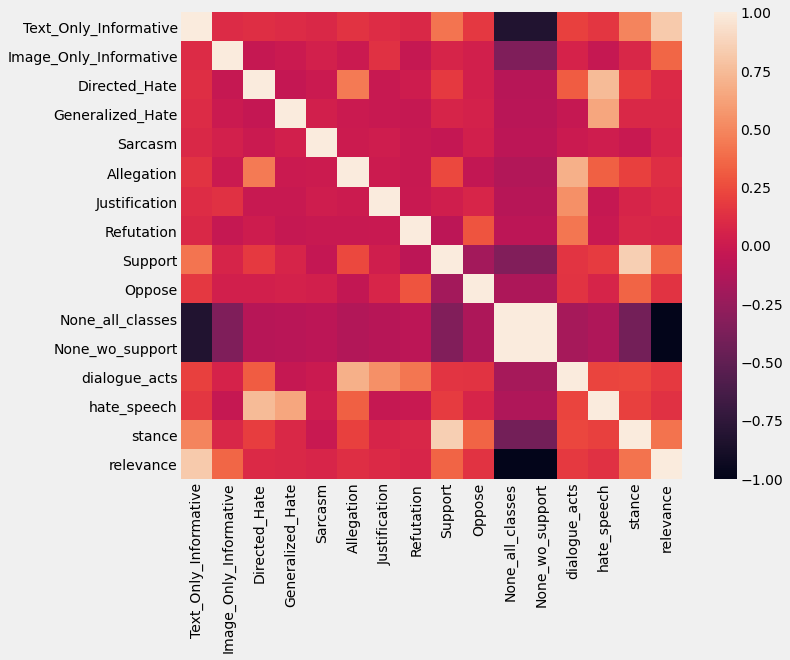

In [ ]:
flag_cols.append('None_all_classes')
flag_cols.append('None_wo_support')
flag_cols.append('dialogue_acts')
flag_cols.append('hate_speech')
flag_cols.append('stance')
flag_cols.append('relevance')

#Correlation Plot
import seaborn as sns
corr = data[flag_cols].corr()

# %matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(corr);

In [ ]:
corr

,Text_Only_Informative,Image_Only_Informative,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose,None_all_classes,None_wo_support,dialogue_acts,hate_speech,stance,relevance
Text_Only_Informative,1.000000,0.105194,0.121024,0.104652,0.088198,0.145421,0.114258,0.089508,0.418427,0.171672,-0.827536,-0.827906,0.209567,0.162727,0.491102,0.827906
Image_Only_Informative,0.105194,1.000000,-0.030931,-0.002129,0.040187,-0.002311,0.137546,-0.026612,0.066601,0.033247,-0.357012,-0.357172,0.055615,-0.025123,0.081334,0.357172
Directed_Hate,0.121024,-0.030931,1.000000,-0.033611,-0.002460,0.442353,-0.019638,0.008864,0.179613,0.038522,-0.100152,-0.100197,0.314055,0.743724,0.192010,0.100197
Generalized_Hate,0.104652,-0.002129,-0.033611,1.000000,0.035804,-0.005127,-0.017077,-0.024858,0.070111,0.049622,-0.086603,-0.086642,-0.026586,0.643112,0.093438,0.086642
Sarcasm,0.088198,0.040187,-0.002460,0.035804,1.000000,0.001089,0.017457,-0.021487,-0.033634,0.035837,-0.074861,-0.074894,-0.004093,0.022063,-0.012943,0.074894
Allegation,0.145421,-0.002311,0.442353,-0.005127,0.001089,1.000000,0.006416,-0.016359,0.241917,-0.041864,-0.120341,-0.120395,0.693913,0.335504,0.208502,0.120395
Justification,0.114258,0.137546,-0.019638,-0.017077,0.017457,0.006416,1.000000,-0.010135,0.023800,0.074699,-0.094552,-0.094594,0.545207,-0.026469,0.062644,0.094594
Refutation,0.089508,-0.026612,0.008864,-0.024858,-0.021487,-0.016359,-0.010135,1.000000,-0.075651,0.287108,-0.074071,-0.074104,0.427108,-0.009835,0.081273,0.074104
Support,0.418427,0.066601,0.179613,0.070111,-0.033634,0.241917,0.023800,-0.075651,1.000000,-0.192655,-0.347423,-0.346805,0.155838,0.184516,0.851392,0.346805
Oppose,0.171672,0.033247,0.038522,0.049622,0.035837,-0.041864,0.074699,0.287108,-0.192655,1.000000,-0.143100,-0.143164,0.148298,0.062706,0.350679,0.143164


#MODELING

## Splitting Train Data (only for *Support* label)

In [ ]:
attribute = data.clean_text
target = data.Support

attribute_train, attribute_test, target_train, target_test = train_test_split(attribute, target, test_size = 0.2, random_state = 225)

print('attribute_train :', len(attribute_train))
print('attribute_test  :', len(attribute_test))
print('target_train :', len(target_train))
print('target_test  :', len(target_test))

attribute_train : 5495
attribute_test  : 1374
target_train : 5495
target_test  : 1374


### Defining the Model

We will train the model of this project by Vectorizing using **TF-IDF** and the Classifier using **Logistic Regression** 

Other options for Vectorizers are `CountVectorizer` and `HashingVectorizer`. And as for Classifiers, there are : 

1.   sklearn.ensemble `RandomForestClassifier`,
2.   sklearn.naive_bayes `BernoulliNB`,
3.   sklearn.svm `SVC`

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

### Create Model Pipeline

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. Here, the parameters are our Vectorizer and Classifier.

In [ ]:
tvec = TfidfVectorizer()
clf2 = LogisticRegression()
nb = BernoulliNB()
svc = SVC()

from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)
                 ])
model.fit(attribute_train, target_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

### Test with attribute_test

We will perform a testing with `attribute_test` and then compare the actual result from `response_test`. 

After that, display the *confusion_matrix*, which is also known as an error matrix, a specific table layout that allows visualization of the performance of an algorithm

<img height="200" src="https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/60900/versions/13/screenshot.png" alt="Confusion Matrix" />

In [ ]:
from sklearn.metrics import confusion_matrix

verdict = model.predict(attribute_test)

confusion_matrix(verdict, target_test)

array([[918, 427],
       [ 17,  12]])

In [ ]:
target_test.sum()

439.0

Display the weighted accuracy we got by comparing the test result of `verdict` and actual result of `target_test`

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(verdict, target_test))
print("Precision - Weighted : ", precision_score(verdict, target_test, average = 'weighted'))
print("Recall - Weighted: ", recall_score(verdict, target_test, average = 'weighted'))
print("F1 Score - Weighted : ", f1_score(verdict, target_test, average = 'weighted'))

Accuracy :  0.6768558951965066
Precision - Weighted :  0.9616726093534241
Recall - Weighted:  0.6768558951965067
F1 Score - Weighted :  0.7893494373039305


##PREDICTIONS (for all Classes)

In [ ]:
sub=data[['clean_text','Directed_Hate', 'Generalized_Hate', 'Sarcasm', 'Allegation','Justification', 'Refutation', 'Support', 'Oppose']]
sub.head()

,clean_text,Directed_Hate,Generalized_Hate,Sarcasm,Allegation,Justification,Refutation,Support,Oppose
0,what shock hey old bill is in the clear amp every single moron will swallow this huge pile of shit without single gag,1,0,0,1,1,0,0,0
1,no bucky people are pissed off at ashleyperkins89 for attacking the credibility of an assault survivor after the attacker thomas ravenel was arrested as the result of four month police investigation the only people questioning the movement are men and rape enablers,0,0,0,0,1,0,1,0
2,if sarah hanson young thinks is unfit for office its hypocritical if she does not also think who faced similar allegation is not also unfit for office,0,0,0,0,0,0,1,0
3,days19 million tweetsone powerful movementtoday marks one year since went viral sexual amp gender based violence is human rights violation and were committed to ending it,0,0,0,0,0,0,1,0
4,how an attempt to criticize went delightfully wrong,0,0,0,0,0,0,0,0


In [ ]:
categories = ['Directed_Hate', 'Generalized_Hate', 'Sarcasm', 'Allegation','Justification', 'Refutation', 'Support', 'Oppose']

train, test = train_test_split(sub, random_state=42, test_size=0.2, shuffle=True)
X_train = train.clean_text
X_test = test.clean_text
print(X_train.shape)
print(X_test.shape)

(5495,)
(1374,)


###Pipeline for all Labels

In [ ]:
# Define a pipeline combining a text feature extractor with multi label classifier

tvec = TfidfVectorizer()
clf2 = LogisticRegression()
nb = BernoulliNB()
svc = SVC()

model = Pipeline([('vectorizer',tvec)
                 ,('bernaulli_classifier',nb)
                 ])

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    model.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = model.predict(X_test)
    print('Test F1-Score using Bernaulli\'s NB is {}'.format(f1_score(test[category], prediction)))
    #print('Test Weighted F1-Score using Logistic is {}'.format(f1_score(test[category], prediction, average = 'weighted')))

... Processing Directed_Hate
Test F1-Score using Bernaulli's NB is 0.0
... Processing Generalized_Hate
Test F1-Score using Bernaulli's NB is 0.0
... Processing Sarcasm
Test F1-Score using Bernaulli's NB is 0.0
... Processing Allegation
Test F1-Score using Bernaulli's NB is 0.027777777777777776
... Processing Justification
Test F1-Score using Bernaulli's NB is 0.0
... Processing Refutation
Test F1-Score using Bernaulli's NB is 0.0
... Processing Support
Test F1-Score using Bernaulli's NB is 0.1522491349480969
... Processing Oppose
Test F1-Score using Bernaulli's NB is 0.0


###BOW Approach - creates Term-document matrix

In [ ]:
categories = ['Directed_Hate', 'Generalized_Hate', 'Sarcasm', 'Allegation','Justification', 'Refutation', 'Support', 'Oppose']

train, test = train_test_split(sub, random_state=42, test_size=0.2, shuffle=True)
X_train = train.clean_text
X_test = test.clean_text
print(X_train.shape)
print(X_test.shape)

(5495,)
(1374,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(5495, 10705)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5495, 10705)

In [ ]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec) ,('classifier',clf2) ])

text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    text_clf.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = text_clf.predict(X_test)
    print("Accuracy using naive_bayes: ", accuracy_score(prediction,test[category]))
    print('Test F1-Score using naive_bayes {}'.format(f1_score(prediction,test[category])))
    #print('Test Weighted F1-Score using naive_bayes {}'.format(f1_score( prediction, test[category], average = 'weighted')))

... Processing Directed_Hate
Accuracy using naive_bayes:  0.9606986899563319
Test F1-Score using naive_bayes 0.0
... Processing Generalized_Hate
Accuracy using naive_bayes:  0.9796215429403202
Test F1-Score using naive_bayes 0.0
... Processing Sarcasm
Accuracy using naive_bayes:  0.9839883551673945
Test F1-Score using naive_bayes 0.0
... Processing Allegation
Accuracy using naive_bayes:  0.9497816593886463
Test F1-Score using naive_bayes 0.0
... Processing Justification
Accuracy using naive_bayes:  0.9665211062590975
Test F1-Score using naive_bayes 0.0
... Processing Refutation
Accuracy using naive_bayes:  0.9788937409024745
Test F1-Score using naive_bayes 0.0
... Processing Support
Accuracy using naive_bayes:  0.6681222707423581
Test F1-Score using naive_bayes 0.017241379310344824
... Processing Oppose
Accuracy using naive_bayes:  0.9177583697234353
Test F1-Score using naive_bayes 0.0


###SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                                                                                              alpha=1e-3, n_iter_no_change=5, random_state=42))])

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    text_clf_svm.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = text_clf_svm.predict(X_test)
    print("Accuracy using SVM SGD Classifier: ", accuracy_score(prediction,test[category]))
    print('Test F1-Score using SVM {}'.format(f1_score(prediction,test[category])))
    #print('Test Weighted F1-Score using SVM {}'.format(f1_score( prediction, test[category], average = 'weighted')))

... Processing Directed_Hate
Accuracy using SVM SGD Classifier:  0.9606986899563319
Test F1-Score using SVM 0.0
... Processing Generalized_Hate
Accuracy using SVM SGD Classifier:  0.9796215429403202
Test F1-Score using SVM 0.0
... Processing Sarcasm
Accuracy using SVM SGD Classifier:  0.9839883551673945
Test F1-Score using SVM 0.0
... Processing Allegation
Accuracy using SVM SGD Classifier:  0.9497816593886463
Test F1-Score using SVM 0.0
... Processing Justification
Accuracy using SVM SGD Classifier:  0.9665211062590975
Test F1-Score using SVM 0.0
... Processing Refutation
Accuracy using SVM SGD Classifier:  0.9788937409024745
Test F1-Score using SVM 0.0
... Processing Support
Accuracy using SVM SGD Classifier:  0.6739446870451238
Test F1-Score using SVM 0.0
... Processing Oppose
Accuracy using SVM SGD Classifier:  0.9177583697234353
Test F1-Score using SVM 0.0
